<a href="https://colab.research.google.com/github/Ayuniarfina/Final-Project-Bangkit---JKT4-B/blob/Deni-branch/ImageModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
zipref = zipfile.ZipFile('/content/gdrive/My Drive/Data Colab/faceexp.zip')
zipref.extractall('/tmp/dataset')

In [12]:
traindir = '/tmp/dataset/images/images/train'
valdir = '/tmp/dataset/images/images/validation'

traindatagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale=1/255.0,
      #rotation_range=40,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      horizontal_flip=True
      #fill_mode='nearest' 
    )

#traindatagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

traingenerator = traindatagen.flow_from_directory(
    traindir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)


valdatagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

valgenerator = valdatagen.flow_from_directory(
    valdir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

# Kalau split dari dataset
#valgenerator = traindatagen.flow_from_directory(
#    traindir,
#    target_size=(150,150),
#    batch_size=32,
#    class_mode='categorical',
#    subset='validation'
#)

Found 23060 images belonging to 7 classes.
Found 5761 images belonging to 7 classes.


In [15]:
# Model 1
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),    
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),    
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),         
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(7, activation='softmax')
])

#model.summary()

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [17]:
history = model.fit_generator(traingenerator, epochs=10, validation_data=valgenerator)

Epoch 1/10
721/721 [==============================] - 70s 97ms/step - loss: 1.8254 - acc: 0.2822 - val_loss: 2.0106 - val_acc: 0.2579
Epoch 2/10
721/721 [==============================] - 69s 95ms/step - loss: 1.5505 - acc: 0.3947 - val_loss: 1.4626 - val_acc: 0.4317
Epoch 3/10
721/721 [==============================] - 69s 96ms/step - loss: 1.4134 - acc: 0.4545 - val_loss: 1.3886 - val_acc: 0.4557
Epoch 4/10
721/721 [==============================] - 69s 95ms/step - loss: 1.3322 - acc: 0.4908 - val_loss: 1.3565 - val_acc: 0.4742
Epoch 5/10
721/721 [==============================] - 69s 95ms/step - loss: 1.2583 - acc: 0.5172 - val_loss: 1.3730 - val_acc: 0.4678
Epoch 6/10
721/721 [==============================] - 69s 95ms/step - loss: 1.2125 - acc: 0.5374 - val_loss: 1.2206 - val_acc: 0.5324
Epoch 7/10
721/721 [==============================] - 68s 95ms/step - loss: 1.1681 - acc: 0.5556 - val_loss: 1.2482 - val_acc: 0.5187
Epoch 8/10
721/721 [==============================] - 69s 95ms

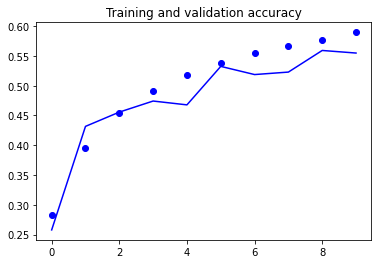

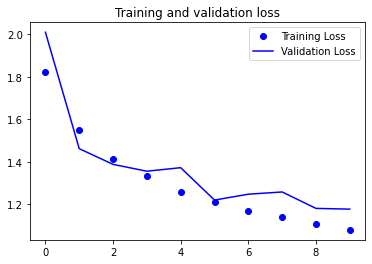

In [18]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
#del history
#tf.keras.backend.clear_session()

In [19]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Using TensorFlow backend.


Saving angry4.jpg to angry4.jpg
Saving sad6.jpg to sad6.jpg
Saving sad5.jpg to sad5.jpg
Saving sad4.jpg to sad4.jpg
Saving sad3.jpg to sad3.jpg
Saving sad2.jpg to sad2.jpg
Saving sad1.jpg to sad1.jpg
Saving angry3.jpg to angry3.jpg
Saving angry2.jpg to angry2.jpg
Saving smile.jpg to smile.jpg
Saving smile2.jpg to smile2.jpg
Saving smile3.jpg to smile3.jpg
Saving angry.jpg to angry.jpg
angry4.jpg
[[1. 0. 0. 0. 0. 0. 0.]]
sad6.jpg
[[1.0000000e+00 0.0000000e+00 0.0000000e+00 2.4231363e-16 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
sad5.jpg
[[0. 0. 0. 1. 0. 0. 0.]]
sad4.jpg
[[7.0114184e-23 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 8.0028899e-09]]
sad3.jpg
[[0. 0. 0. 1. 0. 0. 0.]]
sad2.jpg
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 6.2990296e-10
  0.0000000e+00 1.0000000e+00]]
sad1.jpg
[[1.0000000e+00 0.0000000e+00 0.0000000e+00 1.7772367e-19 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
angry3.jpg
[[1. 0. 0. 0. 0. 0. 0.]]
angry2.jpg
[[9.99197

In [ ]:
traindir = '/tmp/dataset/images/images/train'
valdir = '/tmp/dataset/images/images/validation'

traindatagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale=1/255.0,
      #rotation_range=40,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      horizontal_flip=True
      #fill_mode='nearest' 
      )

traingenerator = traindatagen.flow_from_directory(
    traindir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)


valdatagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale=1/255.0
)

valgenerator = valdatagen.flow_from_directory(
    valdir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
pre_trained_model = tf.keras.applications.inception_v3.InceptionV3(
    include_top= False,
    weights= 'imagenet',
    input_shape= (150,150,3)
)

for layer in pre_trained_model.layers:
  layer.trainable = False

#pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

x = tf.keras.layers.Flatten()(last_output)
x= tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.2)(x)
x= tf.keras.layers.Dense( 7, activation='softmax')(x)

model = tf.keras.Model(pre_trained_model.input,x)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit_generator(traingenerator, epochs=15, validation_data=valgenerator)

Epoch 1/15
901/901 [==============================] - 30s 34ms/step - loss: 1.3911 - acc: 0.4782 - val_loss: 1.1937 - val_acc: 0.5478
Epoch 2/15
901/901 [==============================] - 30s 33ms/step - loss: 1.1922 - acc: 0.5489 - val_loss: 1.1805 - val_acc: 0.5616
Epoch 3/15
901/901 [==============================] - 30s 33ms/step - loss: 1.1016 - acc: 0.5846 - val_loss: 1.1384 - val_acc: 0.5791
Epoch 4/15
901/901 [==============================] - 30s 33ms/step - loss: 1.0248 - acc: 0.6117 - val_loss: 1.1486 - val_acc: 0.5715
Epoch 5/15
901/901 [==============================] - 30s 33ms/step - loss: 0.9795 - acc: 0.6306 - val_loss: 1.1262 - val_acc: 0.5906
Epoch 6/15
901/901 [==============================] - 29s 33ms/step - loss: 0.9132 - acc: 0.6567 - val_loss: 1.1415 - val_acc: 0.5917
Epoch 7/15
901/901 [==============================] - 29s 33ms/step - loss: 0.8574 - acc: 0.6729 - val_loss: 1.1849 - val_acc: 0.5759
Epoch 8/15
901/901 [==============================] - 30s 33ms

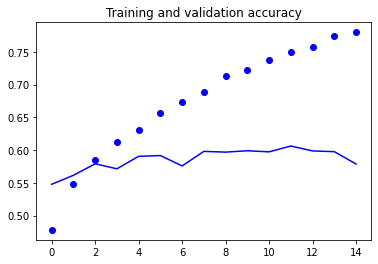

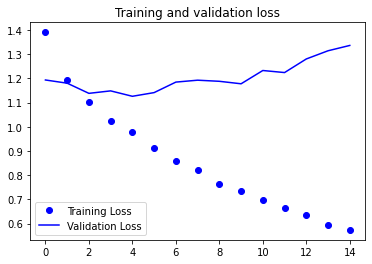

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Fine Tuning
for layer in pre_trained_model.layers:
  layer.trainable = True

print('Number of layers: ', len(pre_trained_model.layers))

Number of layers:  311


In [ ]:
fine_tune_at = 200

for layer in pre_trained_model.layers[:fine_tune_at]:
  layer.trainable = False

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history_fine = model.fit_generator(traingenerator, epochs=20,initial_epoch= history.epoch[-1], validation_data=valgenerator)

Epoch 15/20
901/901 [==============================] - 34s 38ms/step - loss: 0.7944 - acc: 0.7057 - val_loss: 1.4485 - val_acc: 0.6023
Epoch 16/20
901/901 [==============================] - 33s 37ms/step - loss: 0.6343 - acc: 0.7625 - val_loss: 1.4624 - val_acc: 0.6076
Epoch 17/20
901/901 [==============================] - 33s 37ms/step - loss: 0.5573 - acc: 0.7913 - val_loss: 1.5457 - val_acc: 0.6084
Epoch 18/20
901/901 [==============================] - 33s 37ms/step - loss: 0.5091 - acc: 0.8093 - val_loss: 1.4892 - val_acc: 0.6136
Epoch 19/20
901/901 [==============================] - 33s 37ms/step - loss: 0.4666 - acc: 0.8249 - val_loss: 1.6625 - val_acc: 0.6162
Epoch 20/20
901/901 [==============================] - 33s 37ms/step - loss: 0.4301 - acc: 0.8395 - val_loss: 1.6093 - val_acc: 0.6125


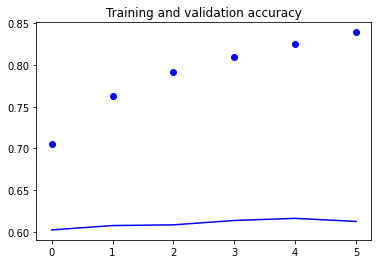

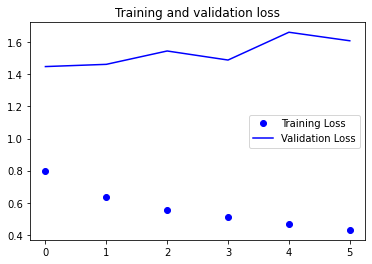

In [ ]:
import matplotlib.pyplot as plt
acc = history_fine.history['acc']
val_acc = history_fine.history['val_acc']
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
del history
del history_fine

In [ ]:
# VGG19

traindir = '/tmp/dataset/images/images/train'
valdir = '/tmp/dataset/images/images/validation'

traindatagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale=1/255.0,
      #rotation_range=40,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      horizontal_flip=True
      #fill_mode='nearest' 
      )

traingenerator = traindatagen.flow_from_directory(
    traindir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)


valdatagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale=1/255.0
)

valgenerator = valdatagen.flow_from_directory(
    valdir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
pre_trained_model = tf.keras.applications.VGG19(
    include_top= False,
    weights= 'imagenet',
    input_shape= (150,150,3)
)

for layer in pre_trained_model.layers:
  layer.trainable = False

#pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

x = tf.keras.layers.Flatten()(last_output)
x= tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.2)(x)
x= tf.keras.layers.Dense( 7, activation='softmax')(x)

model = tf.keras.Model(pre_trained_model.input,x)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit_generator(traingenerator, epochs=10, validation_data=valgenerator)

Epoch 1/10
901/901 [==============================] - 57s 63ms/step - loss: 1.5861 - acc: 0.3858 - val_loss: 1.4324 - val_acc: 0.4509
Epoch 2/10
901/901 [==============================] - 56s 62ms/step - loss: 1.4566 - acc: 0.4386 - val_loss: 1.5128 - val_acc: 0.4063
Epoch 3/10
901/901 [==============================] - 56s 62ms/step - loss: 1.3983 - acc: 0.4659 - val_loss: 1.3135 - val_acc: 0.4993
Epoch 4/10
901/901 [==============================] - 56s 63ms/step - loss: 1.3743 - acc: 0.4721 - val_loss: 1.3164 - val_acc: 0.5031
Epoch 5/10
901/901 [==============================] - 56s 63ms/step - loss: 1.3387 - acc: 0.4885 - val_loss: 1.2714 - val_acc: 0.5119
Epoch 6/10
901/901 [==============================] - 56s 62ms/step - loss: 1.3268 - acc: 0.4909 - val_loss: 1.2975 - val_acc: 0.5144
Epoch 7/10
901/901 [==============================] - 56s 62ms/step - loss: 1.3163 - acc: 0.4939 - val_loss: 1.3110 - val_acc: 0.5000
Epoch 8/10
901/901 [==============================] - 56s 62ms

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit_generator(traingenerator, epochs=20,initial_epoch= history.epoch[-1], validation_data=valgenerator)

Epoch 10/20
901/901 [==============================] - 56s 62ms/step - loss: 1.2565 - acc: 0.5141 - val_loss: 1.2665 - val_acc: 0.5229
Epoch 11/20
901/901 [==============================] - 56s 62ms/step - loss: 1.2370 - acc: 0.5200 - val_loss: 1.2896 - val_acc: 0.5074
Epoch 12/20
901/901 [==============================] - 56s 62ms/step - loss: 1.2275 - acc: 0.5238 - val_loss: 1.2596 - val_acc: 0.5204
Epoch 13/20
901/901 [==============================] - 56s 62ms/step - loss: 1.2175 - acc: 0.5301 - val_loss: 1.2786 - val_acc: 0.5156
Epoch 14/20
901/901 [==============================] - 56s 62ms/step - loss: 1.2082 - acc: 0.5304 - val_loss: 1.2968 - val_acc: 0.5013
Epoch 15/20
901/901 [==============================] - 56s 62ms/step - loss: 1.1983 - acc: 0.5353 - val_loss: 1.2601 - val_acc: 0.5113
Epoch 16/20
901/901 [==============================] - 56s 62ms/step - loss: 1.1901 - acc: 0.5415 - val_loss: 1.2675 - val_acc: 0.5177
Epoch 17/20
901/901 [==============================] - 

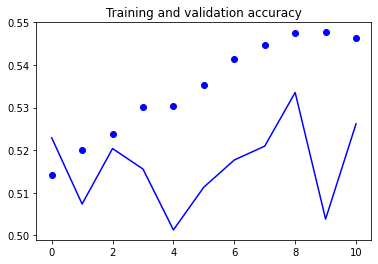

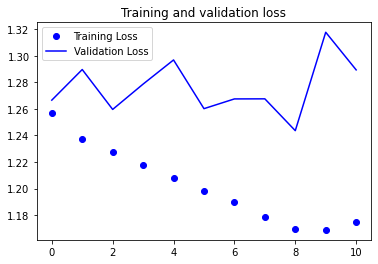

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Fine Tuning
for layer in pre_trained_model.layers:
  layer.trainable = True

print('Number of layers: ', len(pre_trained_model.layers))

In [ ]:
fine_tune_at = 200

for layer in pre_trained_model.layers[:fine_tune_at]:
  layer.trainable = False

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history_fine = model.fit_generator(traingenerator, epochs=20,initial_epoch= history.epoch[-1], validation_data=valgenerator)

In [ ]:
import matplotlib.pyplot as plt
acc = history_fine.history['acc']
val_acc = history_fine.history['val_acc']
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()